# Finding Heavy Traffic Indicators on I-94

I am going to analyze a data set about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.
The dataset is available [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)


## Reading in dataset

I will read in the dataset and carry out some basic exploration of the dataset. 


In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

#Basic Exploration of the dataset

print(traffic.head())
print(traffic.tail())
print(traffic.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## Visualizing the Distribution of the Traffic Volume

By utilising a histogram, I will analyze the distribution of the Traffic Volume. But firstly, we need to import relevant libraries to assist us in visualizing the data.


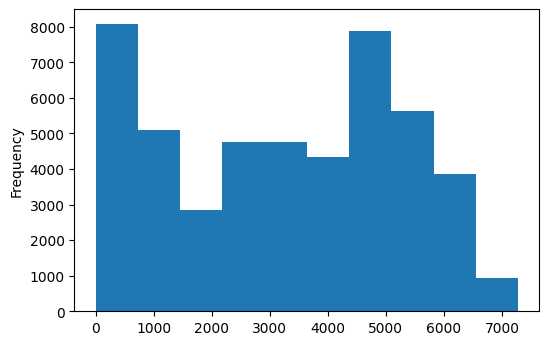

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()


In [3]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

I would believe that the time of the day - daytime or nighttime, is likely to affect the traffic volume. The dataset provide only measures the traffic of those travelling eastwards. People may travel eastwards for work related purposes during the day and back during the night. However, their travel westwards would not be captured. Hence, there may be lower traffic during nighttime shown in the dataset as there are fewer people travelling eastwards because most employees work during the day. 

## Traffic Volume during Day and Night

As in above, about one quarter of the time, there were 1,193 cars or fewer passing the station each hour, which could be during the night or when the road is under construction. In another quarter of time, the traffic volume was four times as much(4,933 cars or more) which could be due cars travelling during the day. 

Hence, we shall make use of the dataset given to find out if there is a correlation between the time and traffic volume.

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

Albeit not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.


In [4]:
# To allow us to deal with time data, we will make use of datetime class
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

# Isolate the different time data'
#insert the boolean series into the dataframe to return me the set 
day = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
night = traffic[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour >= 19)]

Now, we will make use of a histogram to compare the traffic volume during the day and night. 

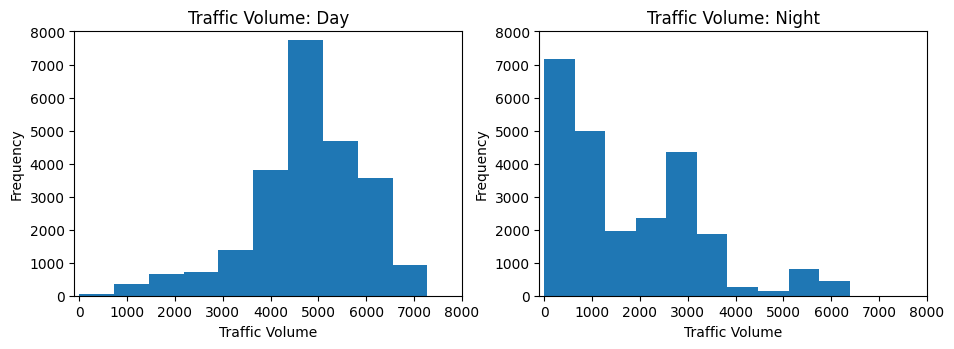

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (11,3.5))

plt.subplot(1, 2, 1)
day['traffic_volume'].plot.hist()
plt.title('Traffic Volume: Day')
plt.xlim(-100,8000)
plt.ylim(0,8000)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
night['traffic_volume'].plot.hist()
plt.title('Traffic Volume: Night')
plt.xlim(-100,8000)
plt.ylim(0,8000)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Look up statistics for both day and night
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [7]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the histogram we plotted above, we can notice that the traffic volume in the day follows a left skewed distribution whereas the traffic volume during the night follows a right skewed distribution. 
This shows that the traffic volume during the day tends to be high, having more than 4,252 cars passing the station 75% of the time.(because 25% of the values are less than 4252).
Similarly, this shows that the traffic volume during the night tends to be low, having less than 2,819 cars passing the station 75% of the time.
Henceforth, as our goal is to find indicators heavy traffic, we should only focus on the data gotten during the day. 



## Time Indicators
There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

I will ultilise a line graph to visualise how the traffic volume changes each month on average. 

In [8]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-8-b104fbd4ed31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

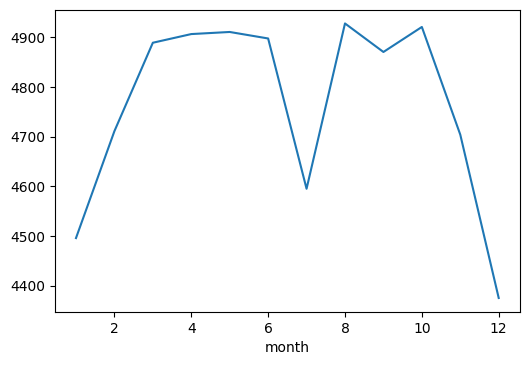

In [9]:
by_month['traffic_volume'].plot()
plt.show()

From the line graph plotted, we can notice that the average trafic volume tends to be signifcantly lower during the start and towards the end of the year. Also, there is a sharp decrease in average traffic volume during July.
This could be accrued to poor weather conditions during the cold months (Often occurs during the start and end of the year). The anomaly in July may be due to factors like road maintenance or natural weather hazards which reduced travelling volume for the month.

To investigate the anomaly in July, we should zoom out and view the traffic volume during the years.

<ipython-input-10-cba92ca5a37a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



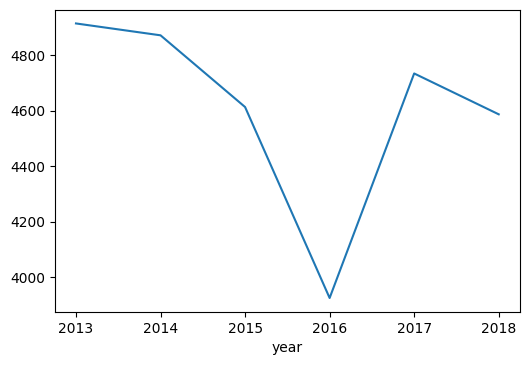

In [10]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()


Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) from 2016 supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

## Time Indicators (Week)
Now we will build a line plot to compare traffic volume for different days of the week. 

<ipython-input-11-e80ac7c4e1af>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



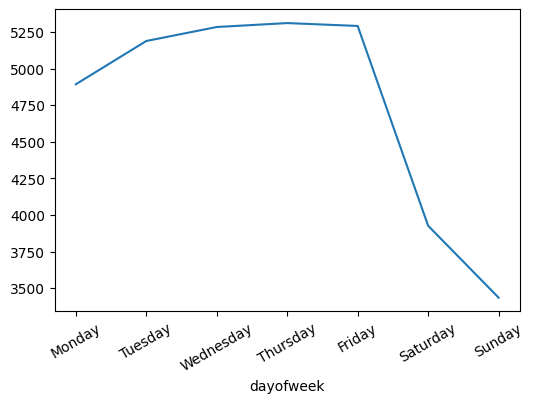

In [11]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
# 0 is Monday, 6 is Sunday
by_dayofweek['traffic_volume'].plot()
plt.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xticks(rotation = 30)
plt.show()

From the line graph plotted above, it can be seen that there is significantly less traffic volume during the weekends(between 3,000 and 4,000) as compared to the weekdays(between 4,750 and 5,250).
This could be due to the road being used for work related purposes. 

## Time Indicators (Hour)
We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [12]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-12-a10e9c766806>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
by_hour_business['traffic_volume'].describe()

count      12.000000
mean     5192.498812
std       615.622781
min      4378.419118
25%      4799.891475
50%      5024.132518
75%      5640.880110
max      6189.473647
Name: traffic_volume, dtype: float64

In [14]:
by_hour_weekend['traffic_volume'].describe()

count      12.000000
mean     3709.128440
std       911.307344
min      1589.365894
25%      3542.880206
50%      4098.037442
75%      4346.478609
max      4372.482883
Name: traffic_volume, dtype: float64

I will visualise the data on a grid chart to show how traffic volume changes by the time of the day

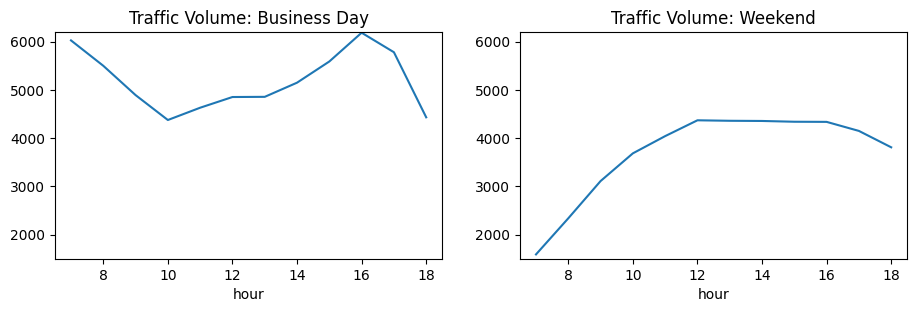

In [15]:
plt.figure(figsize = (11,3))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot()
plt.title('Traffic Volume: Business Day')
plt.xlim(6.5,18.5)
plt.ylim(1500,6200)

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot()
plt.title('Traffic Volume: Weekend')
plt.xlim(6.5,18.5)
plt.ylim(1500,6200)

plt.show()

From the graphs plotted above, we can see that the traffic during the weekend is lower than that during the weekdays - the peak average traffic volume (4,372) is lower than the minimum average traffic volume on a business day(4,378).

The highest average traffic volume during the business days are likely to be the rush hours, occuring at 7am and 4pm. 

For the weekend, the average traffic volume is low but increases during the morning. Traffic Volume remains consistently higher than the morning once it is  past noon. 

To sum it up, there are conclusive trends that shows us the effect time has on the traffic volume.

1. Traffic Volume changes according to the month (Lower volume during the cold months)
2. Traffic Volume changes during the week (Significantly lower during the weekends)
3. Traffic Volume changes for each hour (Higher traffic volume during rush hours on business days and low traffic during the mornings of weekend)

## Weather Indicator

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description`. 

`temp, rain_1h, snow_1h, clouds_all` are numerical so let's start by looking up their correlation values with `traffic_volume`.

In [16]:
print (traffic['traffic_volume'].corr(traffic['temp']))
print (traffic['traffic_volume'].corr(traffic['rain_1h']))
print (traffic['traffic_volume'].corr(traffic['snow_1h']))
print (traffic['traffic_volume'].corr(traffic['clouds_all']))

0.13029879817112658
0.00471370236785923
0.0007334345358283799
0.06705377704283502


All weather conditions seem to have a positive correlation with traffic volume (positive R value). `temp` has the highest correlation value. I will utilise a scatter graph the visualise the correlation.

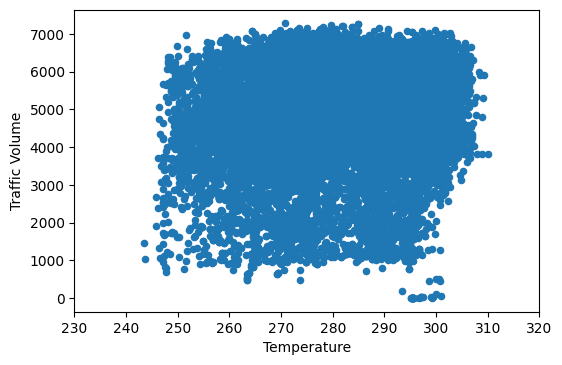

In [17]:
day.plot.scatter('temp','traffic_volume')
plt.xlim(230, 320) # two wrong data points messed up the y axis
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.show()

No visible pattern can be observed from the relationship between traffic volume and temperature. Furthermore, the other correlation values between traffic volume and the numerical weather columns are very small, signalling a very weak relationship. Therefore, these numerical columns are likely not reliable indicators of heavy traffic volume.

As the numerical columns do not provide any reliable indicators of heavy traffic, we will now look for more useful data in the categorical weather related columns: `weather_main and weather_description`.

In [18]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()



In [19]:
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,dayofweek,hour
weather_main,,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,2015.619429,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,2015.321420,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2015.882220,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2015.814917,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2015.557554,2.754197,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2015.527574,2.895102,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2015.572334,2.914467,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2015.916667,2.416667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2015.486245,2.750344,12.153370


Text(0.5, 0, 'Traffic Volume')

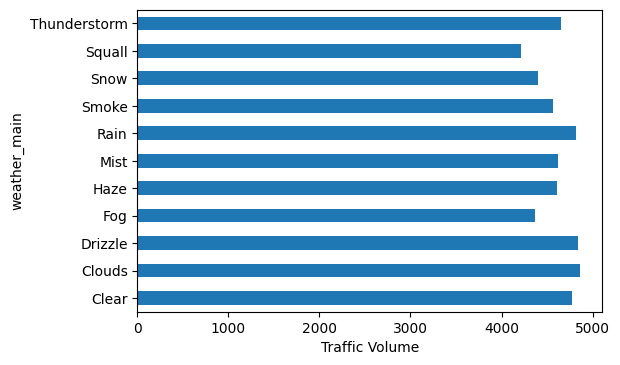

In [20]:
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume')

From the graph above, we can see that none of the weather conditions are able to give an average traffic volume exceeding 5,000 cars. All weather conditions seem to have a similiar average traffic volume, hence we cannot see any weather type as an indicator for heavy traffic volume.

Now we will visualize the data for `by_weather_description`.

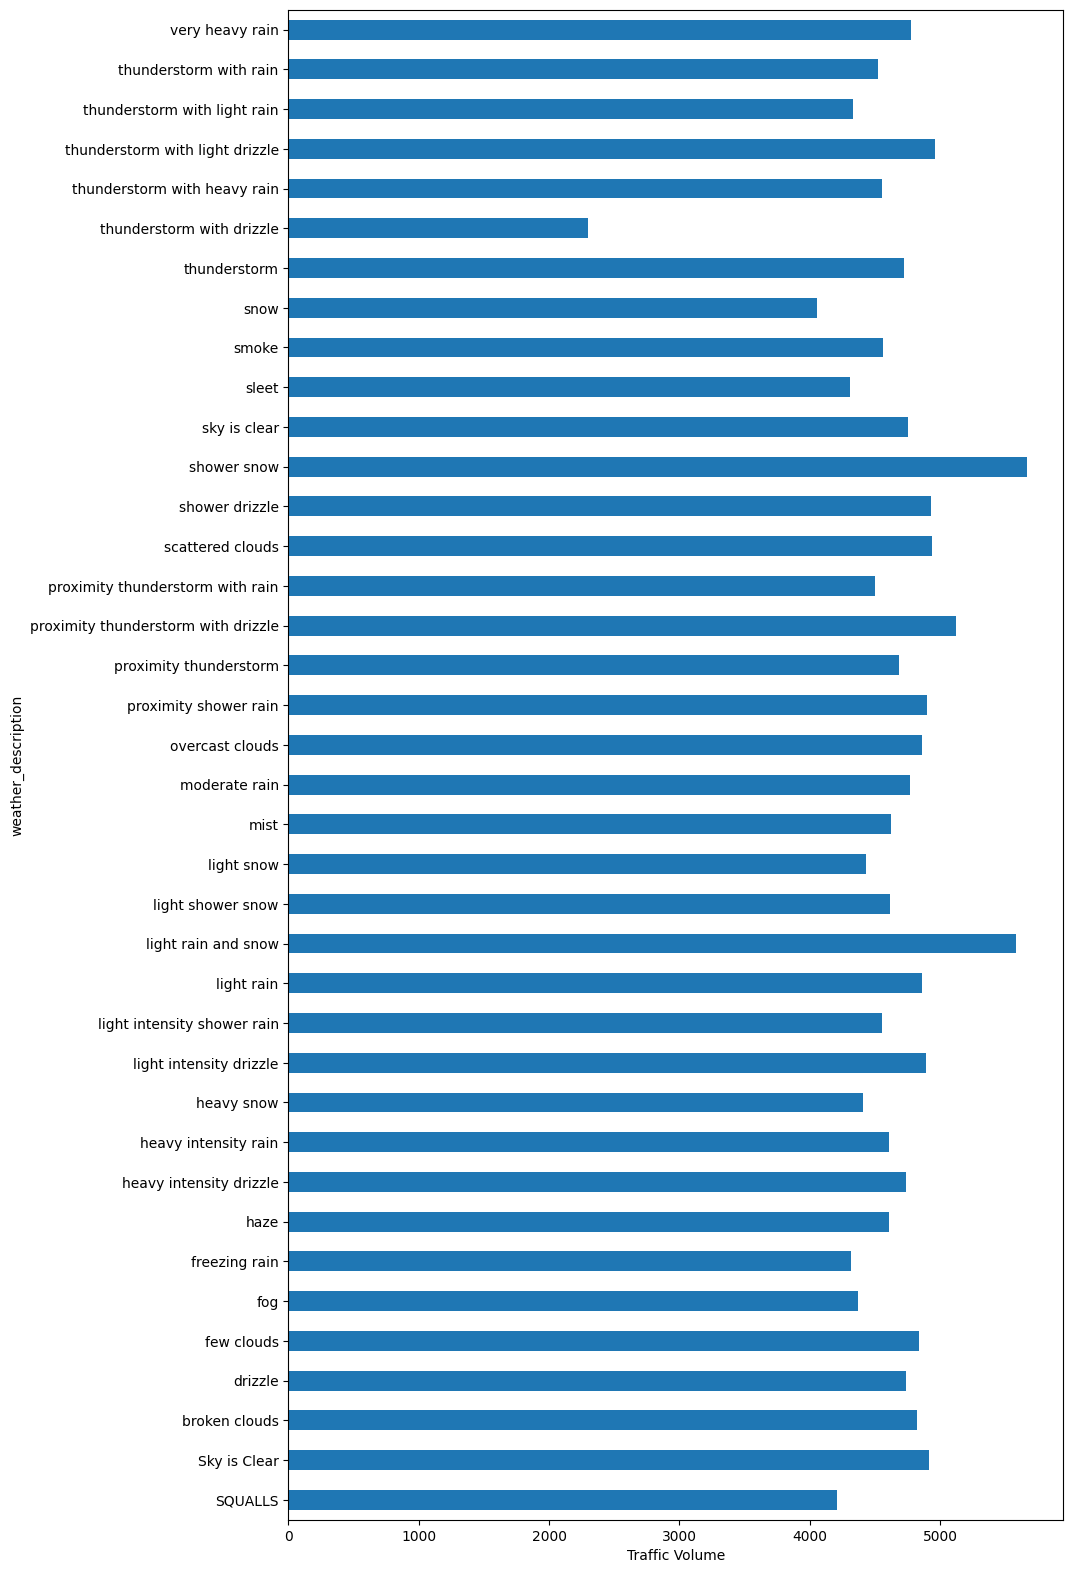

In [21]:
by_weather_description['traffic_volume'].plot.barh(figsize=(10,20))
plt.xlabel('Traffic Volume')
plt.show()

From the graph above, we can see three factors that caused the traffic volume to exceed 5,000.
- Shower Snow
- Light rain and snow
- Proximity Thunderstorm and drizzle

Although bad weather conditions, these conditions are not severely enough to have a clear relationship with heavier traffic volumes, thus it is inconclusive why the highest average traffic volume occurs during these weather types.

## Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators
- The traffic is usually less heavy during the start and end of the year which could be due to it being cold months.
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7am and 4pm.

Weather indicators
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle